# Data Understanding

## Import Library & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_train = pd.read_csv('creditapproval-training.csv', sep=';')
data_test = pd.read_csv('creditapproval-testing.csv', sep=';')
data = pd.concat([data_train, data_test], ignore_index=True)
data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
0,x1,P,40.0,345000,1.0,345000,100.0,301.0,6000.0,1.0,874.0,875.0,345000,345000,0,MACET
1,x2,L,31.0,350000,7.0,55716,100.0,301.0,6000.0,1.0,874.0,875.0,390000,111428,0,MACET
2,x3,L,37.0,649926,6.0,108321,100.0,301.0,6000.0,1.0,874.0,875.0,649926,216642,0,MACET
3,x4,P,2.0,459168,12.0,38264,100.0,301.0,6000.0,1.0,874.0,875.0,459168,382640,0,MACET
4,x5,P,34.0,3055499,8.0,"381937,41",100.0,301.0,6000.0,1.0,874.0,875.0,3055499,"1527749,48",0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Information

In [ ]:
print("Basic Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            866 non-null    object 
 1   jenis_kelamin           866 non-null    object 
 2   umur                    865 non-null    float64
 3   jml_pinjaman            866 non-null    object 
 4   jkw                     866 non-null    float64
 5   jml_angsuran_per_bulan  866 non-null    object 
 6   type_pinjaman           866 non-null    float64
 7   jenis_pinjaman          866 non-null    float64
 8   bi_sektor_ekonomi       865 non-null    float64
 9   col                     866 non-null    float64
 10  bi_golongan_debitur     866 non-null    float64
 11  bi_gol_penjamin         866 non-null    float64
 12  saldo_nominatif         866 non-null    object 
 13  tunggakan_pokok         866 non-null    object 
 14  tunggakan_bunga        

## Data Exploration

Missing Values:
nama_nasabah              104
jenis_kelamin             104
umur                      105
jml_pinjaman              104
jkw                       104
jml_angsuran_per_bulan    104
type_pinjaman             104
jenis_pinjaman            104
bi_sektor_ekonomi         105
col                       104
bi_golongan_debitur       104
bi_gol_penjamin           104
saldo_nominatif           104
tunggakan_pokok           104
tunggakan_bunga           104
status_kredit             102
dtype: int64


Target Variable Distribution:
status_kredit
MACET     615
LANCAR    251
0           1
19          1
Name: count, dtype: int64




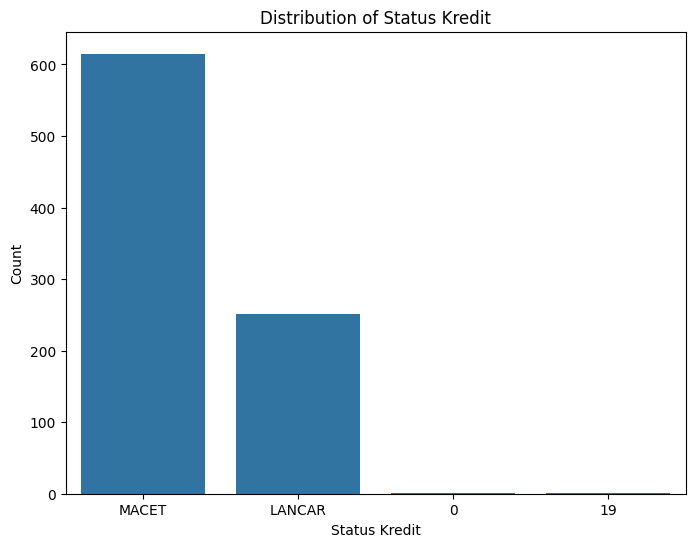

In [ ]:
# Check for missing values
print("Missing Values:")
print(data.isna().sum())
print("\n")

# Explore the target variable
print("Target Variable Distribution:")
print(data['status_kredit'].value_counts())
print("\n")

# Count the occurrences of each 'status_kredit' value
status_kredit_counts = data['status_kredit'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=status_kredit_counts.index, y=status_kredit_counts.values)
plt.xlabel('Status Kredit')
plt.ylabel('Count')
plt.title('Distribution of Status Kredit')
plt.show()

### Splitting Numeric & Object Variables

In [ ]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

### Data visualization

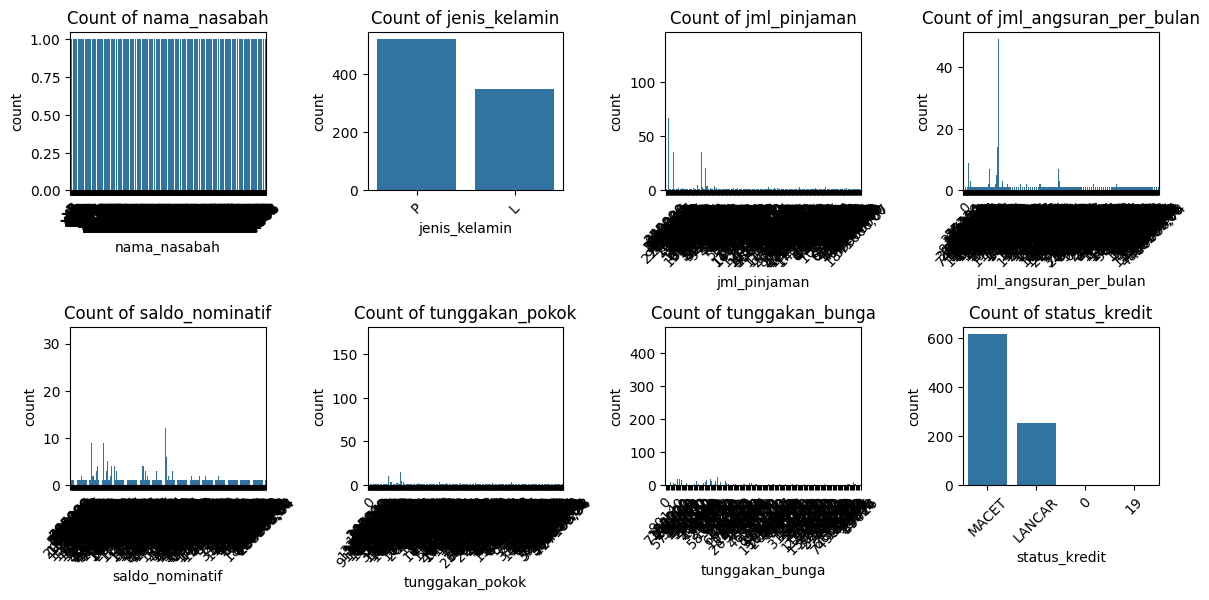

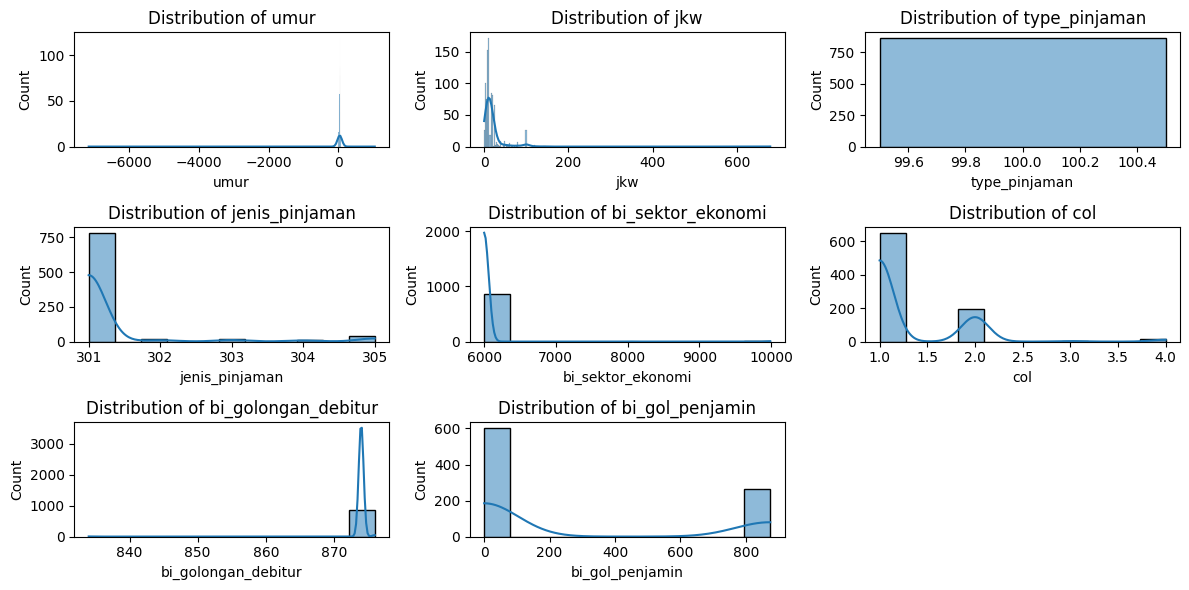

In [ ]:
# Count Plots for Categorical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Distribution of Numerical Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

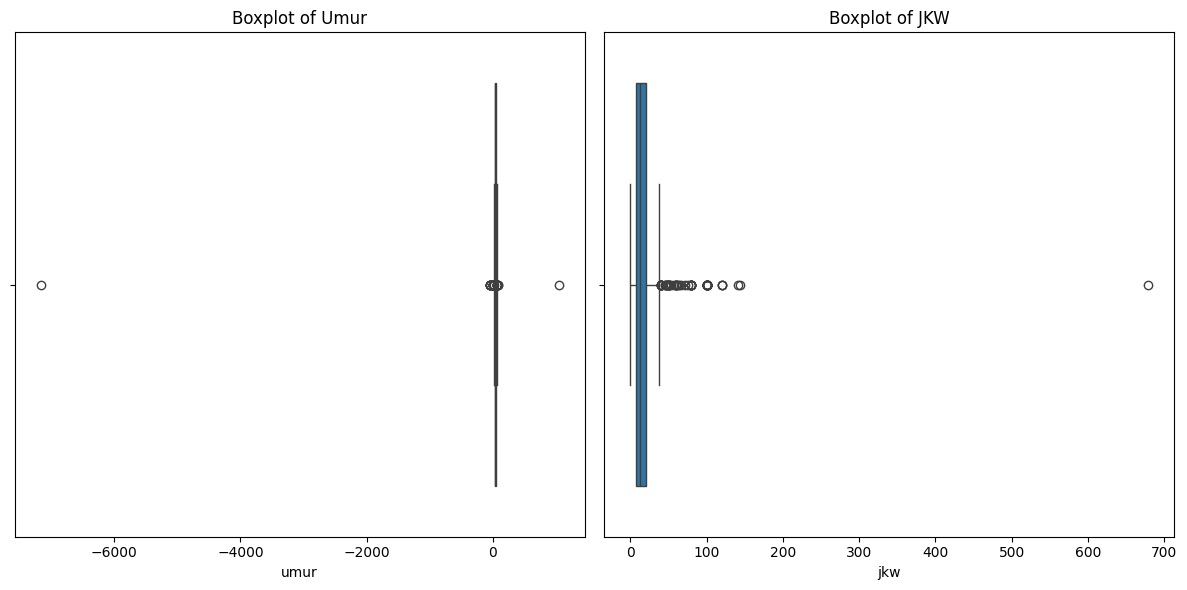

In [ ]:
# Create boxplots for 'umur' and 'jkw'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['umur'])
plt.title('Boxplot of Umur')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['jkw'])
plt.title('Boxplot of JKW')

plt.tight_layout()
plt.show()

# Data Preparation

## Data Cleaning

### Handling NaN Values

In [ ]:
print("Before:")
data.shape

Before:


(970, 16)

In [ ]:
# Remove rows with no name
data = data.dropna(subset=['nama_nasabah'])
print("After:")
data.shape

After:


(866, 16)

In [ ]:
data.isna().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,1
jml_pinjaman,0
jkw,0
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,1
col,0


In [ ]:
data[data['umur'].isna()]

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
723,x724,L,NaN,632728,11.0,"62727,86",100.0,301.0,6000.0,2.0,874.0,0.0,632728,632728,"57277,06",MACET


In [ ]:
data[data['bi_sektor_ekonomi'].isna()]

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
230,x231,P,40.0,500000,5.0,115000,100.0,301.0,NaN,1.0,874.0,875.0,500000,200000,30000,MACET


In [ ]:
# Fill with mean/median for 'umur'
data['umur'].fillna(data['umur'].median(), inplace=True)

#Fill with mode (most frequent value) for 'bi_sektor_ekonomi'
data['bi_sektor_ekonomi'].fillna(data['bi_sektor_ekonomi'].mode()[0], inplace=True)

<ipython-input-35-2d5426001f0e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['umur'].fillna(data['umur'].median(), inplace=True)
<ipython-input-35-2d5426001f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['umur'].fillna(data['umur'].median(), inplace=True)
<ipython-input-35-2d5426001f0e>:5: FutureWarning: A value is trying t

In [ ]:
data.isna().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,0
jml_pinjaman,0
jkw,0
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,0
col,0


### Handling Outliers

In [ ]:
# Calculate the IQR for 'jkw' and 'umur'
Q1_jkw = data['jkw'].quantile(0.25)
Q3_jkw = data['jkw'].quantile(0.75)
IQR_jkw = Q3_jkw - Q1_jkw

Q1_umur = data['umur'].quantile(0.25)
Q3_umur = data['umur'].quantile(0.75)
IQR_umur = Q3_umur - Q1_umur

# Define the lower and upper bounds for outliers
lower_bound_jkw = Q1_jkw - 1.5 * IQR_jkw
upper_bound_jkw = Q3_jkw + 1.5 * IQR_jkw

lower_bound_umur = Q1_umur - 1.5 * IQR_umur
upper_bound_umur = Q3_umur + 1.5 * IQR_umur

# Replace outliers with the median
median_jkw = data['jkw'].median()
median_umur = data['umur'].median()


data['jkw'] = data['jkw'].apply(lambda x: median_jkw if x < lower_bound_jkw or x > upper_bound_jkw else x)
data['umur'] = data['umur'].apply(lambda x: median_umur if x < lower_bound_umur or x > upper_bound_umur else x)

<ipython-input-37-4b37571bf490>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['jkw'] = data['jkw'].apply(lambda x: median_jkw if x < lower_bound_jkw or x > upper_bound_jkw else x)
<ipython-input-37-4b37571bf490>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['umur'] = data['umur'].apply(lambda x: median_umur if x < lower_bound_umur or x > upper_bound_umur else x)


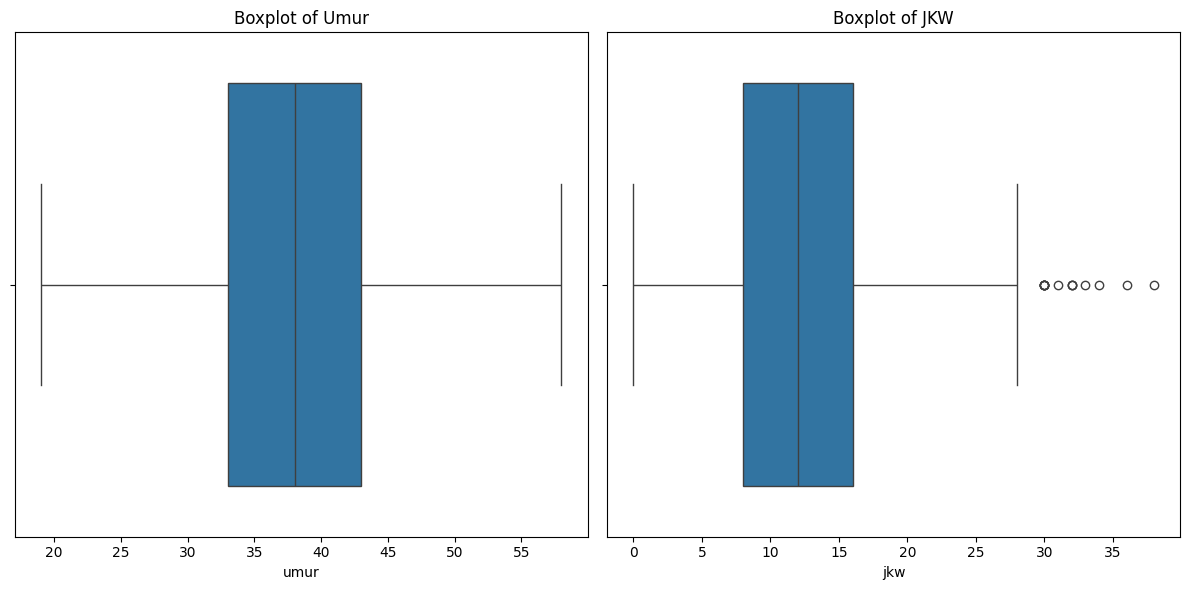

In [ ]:
# Create boxplots for 'umur' and 'jkw'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['umur'])
plt.title('Boxplot of Umur')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['jkw'])
plt.title('Boxplot of JKW')

plt.tight_layout()
plt.show()

### Fixing  dtypes

In [ ]:
kolom_konversi_numeric = ['jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']
kolom_konversi_object = ['bi_golongan_debitur', 'bi_sektor_ekonomi', 'bi_gol_penjamin', 'type_pinjaman', 'jenis_pinjaman']

# Loop through each column and apply the conversion
for kolom in kolom_konversi_numeric:
    # Apply strip and replace only to the current column (Series)
    data[kolom] = data[kolom].str.strip().str.replace(',', '.').apply(pd.to_numeric, errors='coerce')
for kolom in kolom_konversi_object:
    data[kolom] = data[kolom].astype('object')


print("Basic Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 865
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            866 non-null    object 
 1   jenis_kelamin           866 non-null    object 
 2   umur                    866 non-null    float64
 3   jml_pinjaman            866 non-null    float64
 4   jkw                     866 non-null    float64
 5   jml_angsuran_per_bulan  866 non-null    float64
 6   type_pinjaman           866 non-null    object 
 7   jenis_pinjaman          866 non-null    object 
 8   bi_sektor_ekonomi       866 non-null    object 
 9   col                     866 non-null    float64
 10  bi_golongan_debitur     866 non-null    object 
 11  bi_gol_penjamin         866 non-null    object 
 12  saldo_nominatif         866 non-null    float64
 13  tunggakan_pokok         866 non-null    float64
 14  tunggakan_bunga         866 

<ipython-input-39-2284bcfd5625>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom] = data[kolom].str.strip().str.replace(',', '.').apply(pd.to_numeric, errors='coerce')
<ipython-input-39-2284bcfd5625>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom] = data[kolom].astype('object')
<ipython-input-39-2284bcfd5625>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

### Result

In [ ]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

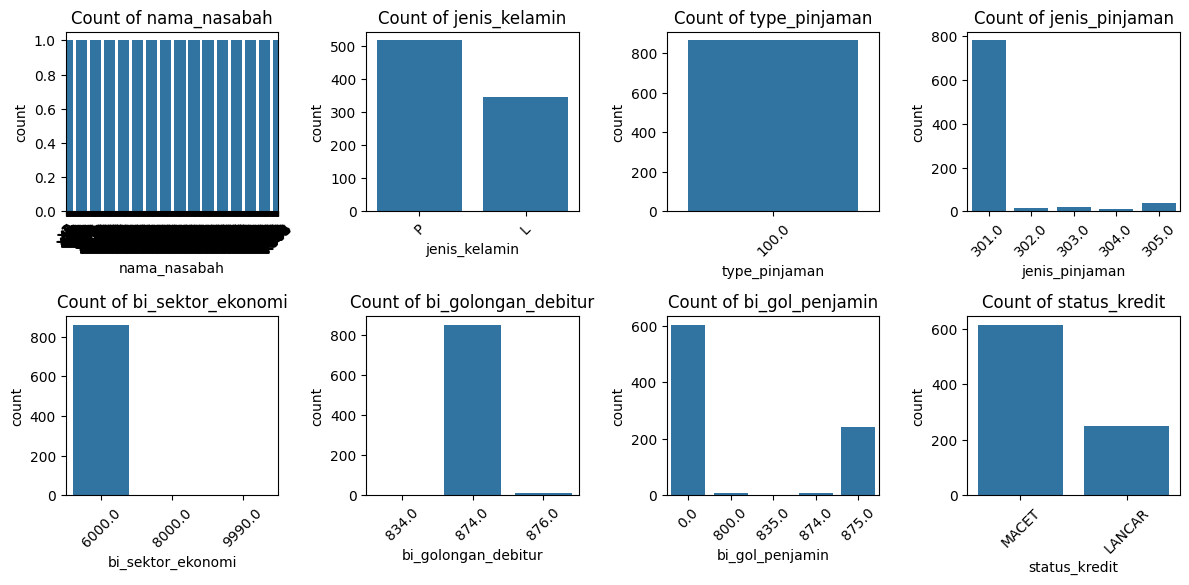

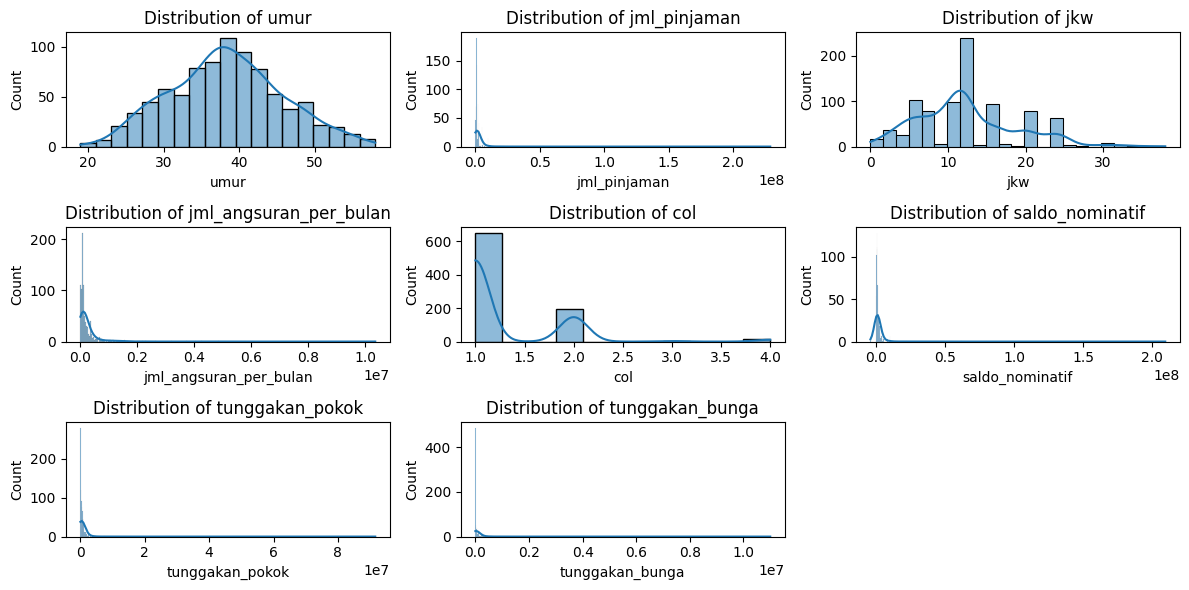

In [ ]:
# Count Plots for Categorical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Distribution of Numerical Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Splitting Data Train & Test

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'status_kredit' is your target variable
X = data.drop(['status_kredit', 'nama_nasabah', 'type_pinjaman'], axis=1)
y = data['status_kredit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have:
# X_train, y_train: Your training data (features and target)
# X_test, y_test: Your testing data (features and target)

# You can use these to train your model and evaluate its performance.

In [ ]:
print("X_train rows:", X_train.shape[0])
print("X_test rows:", X_test.shape[0])

X_train rows: 692
X_test rows: 174


## Encode Categorical Feature

In [ ]:
# Encode Feature data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = [col for col in categorical_cols if col not in ['status_kredit', 'nama_nasabah', 'type_pinjaman']]
# Create OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for DataFrame output

# Fit on training data and transform both train and test
encoded_train = encoder.fit_transform(X_train[categorical_cols])
encoded_test = encoder.transform(X_test[categorical_cols])

# Create DataFrames from encoded data
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Concatenate encoded features with original numerical features
X_train_encoded = pd.concat([X_train.drop(categorical_cols, axis=1), encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(categorical_cols, axis=1), encoded_test_df], axis=1)

X_train_encoded.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,col,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,jenis_kelamin_L,jenis_kelamin_P,...,bi_sektor_ekonomi_8000.0,bi_sektor_ekonomi_9990.0,bi_golongan_debitur_834.0,bi_golongan_debitur_874.0,bi_golongan_debitur_876.0,bi_gol_penjamin_0.0,bi_gol_penjamin_800.0,bi_gol_penjamin_835.0,bi_gol_penjamin_874.0,bi_gol_penjamin_875.0
count,692.000000,6.920000e+02,692.000000,6.920000e+02,692.000000,6.920000e+02,6.920000e+02,6.920000e+02,692.000000,692.000000,...,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,38.277457,2.755123e+06,12.248555,2.490482e+05,1.293353,2.059702e+06,7.868398e+05,7.969955e+04,0.404624,0.595376,...,0.001445,0.001445,0.001445,0.991329,0.007225,0.692197,0.008671,0.001445,0.008671,0.289017
std,7.469642,1.052087e+07,6.345258,6.204153e+05,0.576241,9.042983e+06,4.252818e+06,5.518433e+05,0.491174,0.491174,...,0.038014,0.038014,0.038014,0.092778,0.084756,0.461919,0.092778,0.038014,0.092778,0.453634
min,19.000000,8.333333e+04,0.000000,0.000000e+00,1.000000,4.300000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,8.901250e+05,8.000000,7.200012e+04,1.000000,5.603750e+05,8.333333e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,1.440225e+06,12.000000,1.049460e+05,1.000000,9.479803e+05,3.010417e+05,0.000000e+00,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000e+06,16.000000,2.300000e+05,1.250000,1.666662e+06,7.248750e+05,4.500000e+04,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,58.000000,2.286550e+08,38.000000,1.035000e+07,4.000000,2.094041e+08,9.161212e+07,1.100000e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object and fit on y_train
label_encoder = LabelEncoder().fit(y_train)

# Transform both y_train and y_test and create DataFrames directly
y_train_encoded = pd.DataFrame({'status_kredit_encoded': label_encoder.transform(y_train)}, index=y_train.index)
y_test_encoded = pd.DataFrame({'status_kredit_encoded': label_encoder.transform(y_test)}, index=y_test.index)
y_train_encoded

,status_kredit_encoded
818,1
558,1
428,1
7,0
506,0
...,...
106,1
270,0
860,0
435,1


## Correlation matrix

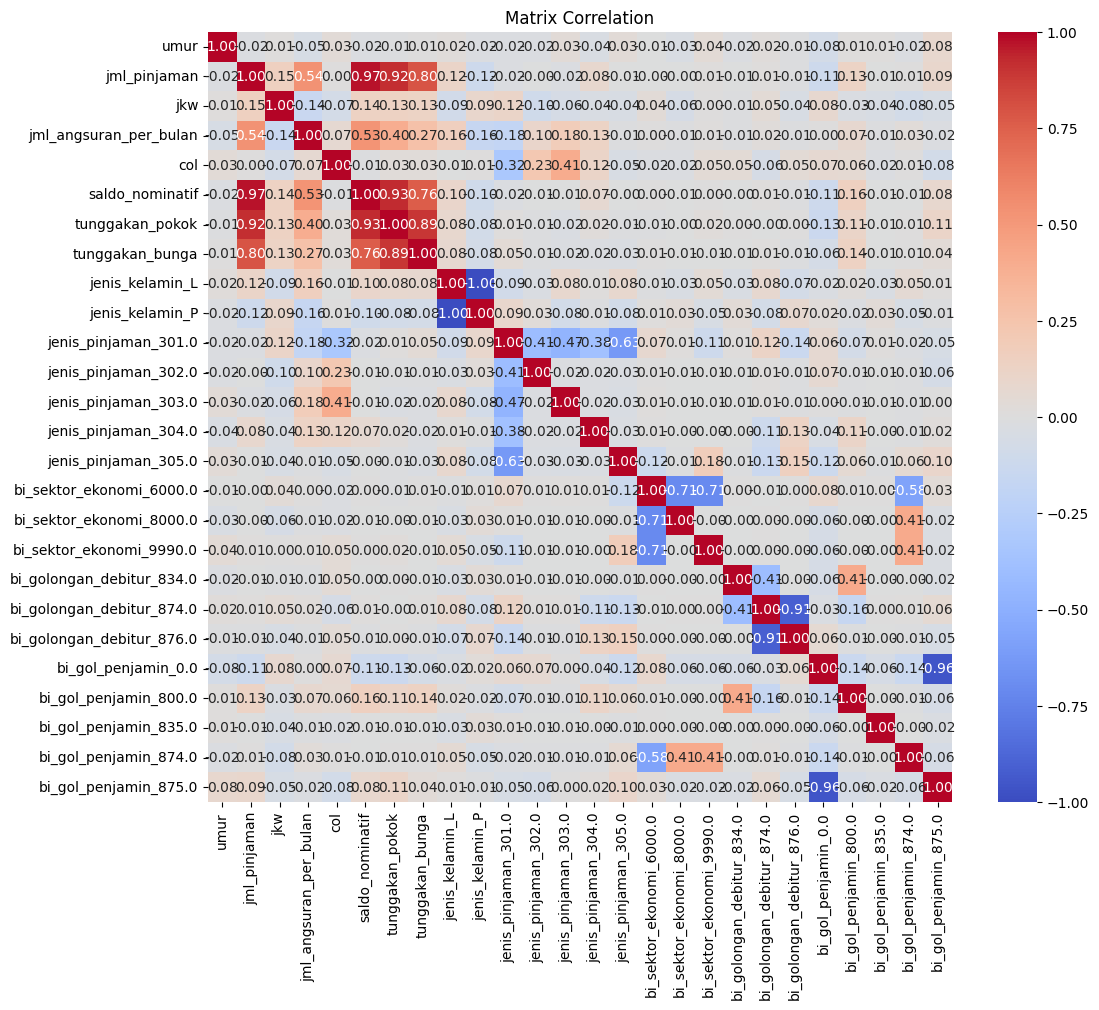

In [ ]:
# Visualize heatmap correlation
correlation_matrix = X_train_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Correlation')
plt.show()

# Modeling

In [ ]:
!pip install xgboost

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier # Increase max_iter if needed for convergence
from xgboost import callback

## Training Model

In [ ]:
def train_models(X_train, y_train):
    models = {
        'XGBoost': XGBClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }

    trained_models = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model

    return trained_models

In [ ]:
# Train models
trained_models = train_models(X_train_encoded, y_train_encoded)

Training XGBoost...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature Importance

In [ ]:
import shap
selected_features_dict = {}

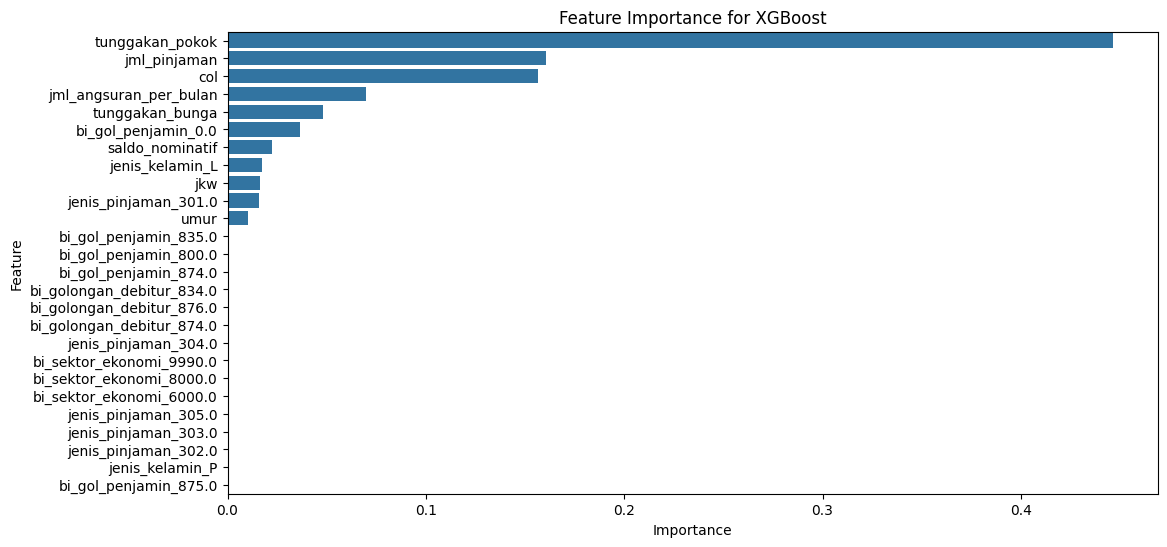

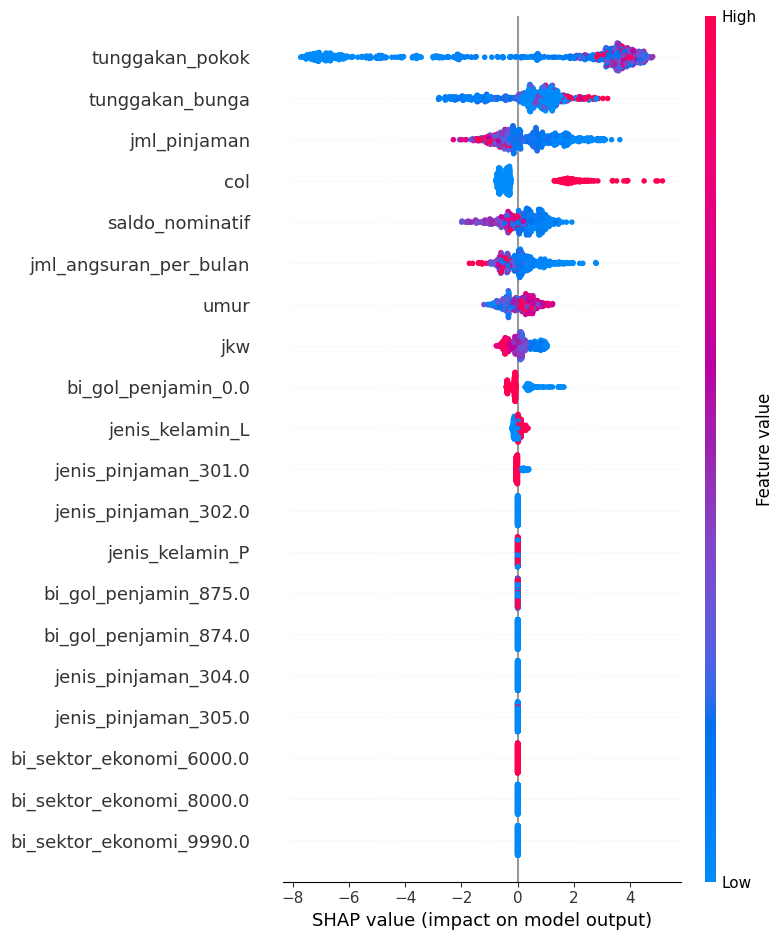

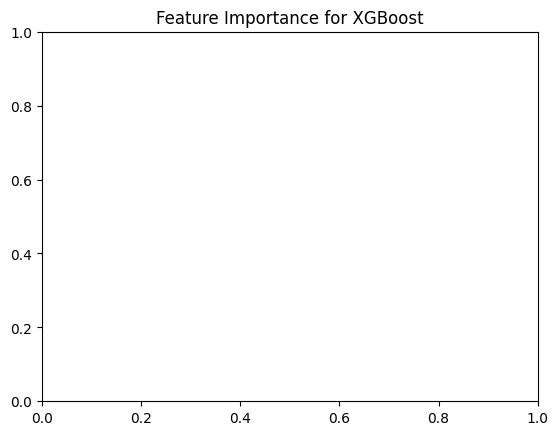

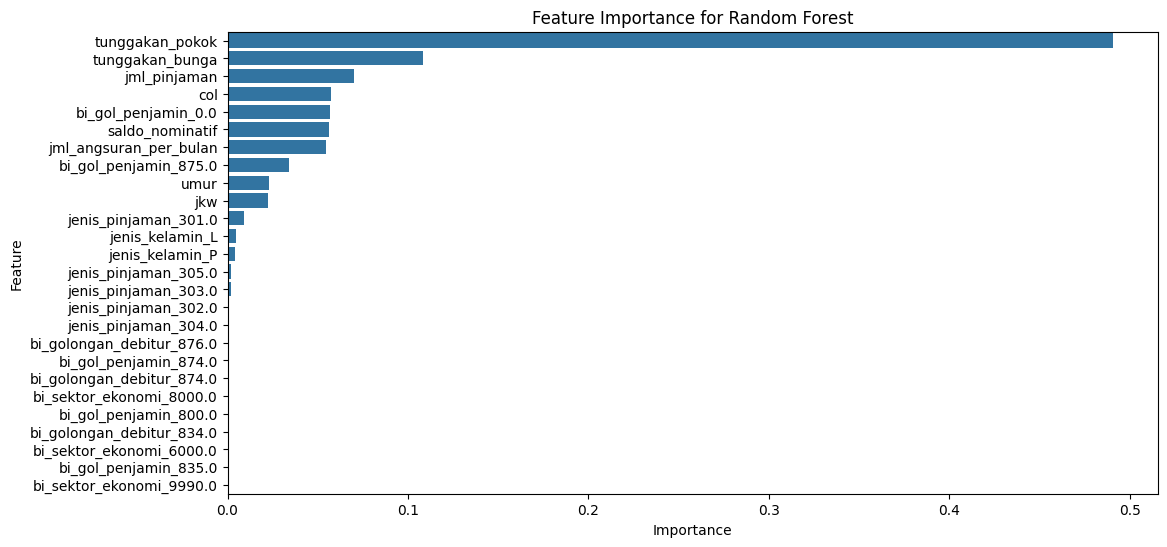

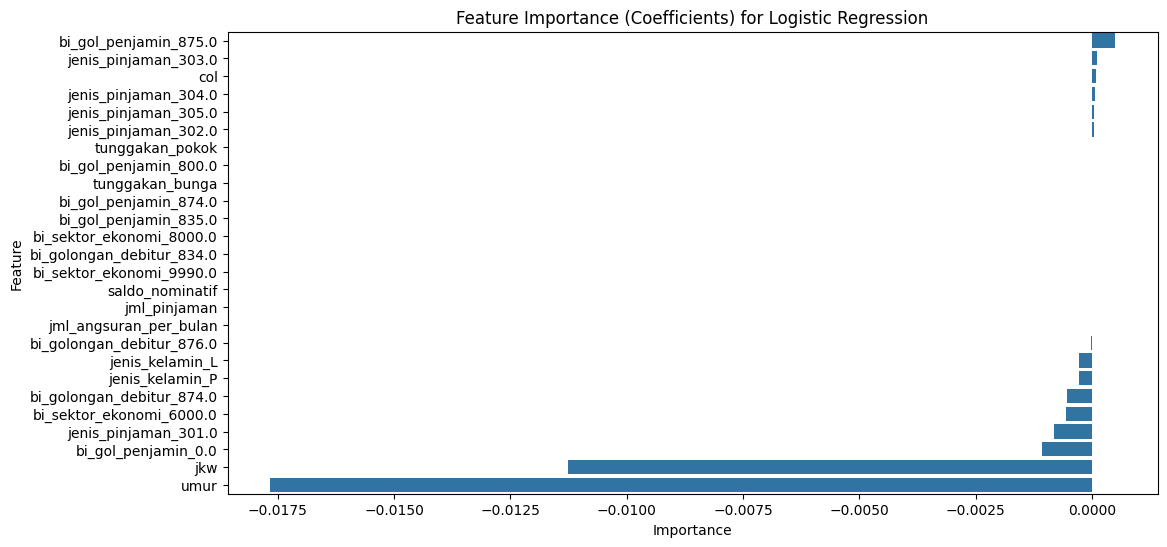

{'XGBoost': ['tunggakan_pokok',
  'jml_pinjaman',
  'col',
  'jml_angsuran_per_bulan',
  'tunggakan_bunga'],
 'Random Forest': ['tunggakan_pokok',
  'tunggakan_bunga',
  'jml_pinjaman',
  'col',
  'bi_gol_penjamin_0.0'],
 'Logistic Regression': ['bi_gol_penjamin_875.0',
  'jenis_pinjaman_303.0',
  'col',
  'jenis_pinjaman_304.0',
  'jenis_pinjaman_305.0']}

In [ ]:
def get_feature_importance_and_visualize(trained_models, X_train_encoded):
  """
  Calculates and visualizes feature importance for trained models.

  Args:
      trained_models: A dictionary of trained models.
      X_train_encoded: The encoded training data (features).
  """
  for model_name, model in trained_models.items():
    if hasattr(model, 'feature_importances_'):
      feature_importances = model.feature_importances_
      feature_names = X_train_encoded.columns
      df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
      df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)
      top_5_features = df_feature_importance['Feature'].head(5).tolist()
      selected_features_dict[model_name] = top_5_features
      # Visualize feature importance
      plt.figure(figsize=(12, 6))
      sns.barplot(x='Importance', y='Feature', data=df_feature_importance)
      plt.title(f'Feature Importance for {model_name}')
      plt.show()
      if model_name == 'XGBoost':
        # Calculate SHAP values for XGBoost
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train_encoded)
        # Plot SHAP summary plot
        shap.summary_plot(shap_values, X_train_encoded)
        plt.title(f'Feature Importance for {model_name}')
        plt.show()
    elif model_name == 'Logistic Regression':
      # For Logistic Regression, use coefficients as a proxy for feature importance
      coefficients = model.coef_[0]
      feature_names = X_train_encoded.columns
      df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
      df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)
      top_5_features = df_feature_importance['Feature'].head(5).tolist()
      selected_features_dict[model_name] = top_5_features
      # Visualize feature importance
      plt.figure(figsize=(12, 6))
      sns.barplot(x='Importance', y='Feature', data=df_feature_importance)
      plt.title(f'Feature Importance (Coefficients) for {model_name}')
      plt.show()
  return selected_features_dict

# Call the function to get and visualize feature importance
get_feature_importance_and_visualize(trained_models, X_train_encoded)

In [ ]:
# Permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test_encoded, y_test_encoded, n_repeats=10, random_state=42)

# Get feature names from X_test_encoded columns
feature_names = X_test_encoded.columns.tolist()

# Create dictionary of permutation importance scores
perm_importance_dict = {feature_names[i]: perm_importance.importances_mean[i]
                       for i in range(len(feature_names))}
plot_feature_importance(perm_importance_dict, 'Permutation Importance')

# Print feature importance summary
print("\nFeature Importance Summary:")
importance_df = pd.DataFrame({
    'Weight': pd.Series(weight_importance),
    'Gain': pd.Series(gain_importance),
    'Coverage': pd.Series(coverage_importance),
    'Permutation': pd.Series(perm_importance_dict)
}).fillna(0)

print(importance_df.sort_values('Gain', ascending=False))

In [ ]:
# SHAP values for feature importance
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_encoded)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_encoded)

In [ ]:
top_5_features = X_train_encoded.columns[feature_importances_.argsort()[-5:][::-1]]
top_5_features

## Improved Model

In [ ]:
# prompt: Train a new model with selected feature for each model from selected_features_dict

# Assuming you have 'selected_features_dict' defined from the previous code.
def train_model_with_selected_features(X_train, y_train, model_name, selected_features):
  """
  Trains a model with selected features.

  Args:
      X_train: Training data (features).
      y_train: Training data (target).
      model_name: Name of the model to train (e.g., 'XGBoost').
      selected_features: A list of features to use for training.

  Returns:
      A trained model.
  """
  X_train_selected = X_train[selected_features]

  if model_name == 'XGBoost':
      model = XGBClassifier(random_state=42)
  elif model_name == 'Random Forest':
      model = RandomForestClassifier(random_state=42)
  elif model_name == 'Logistic Regression':
      model = LogisticRegression(random_state=42)
  else:
      raise ValueError("Invalid model name.")

  model.fit(X_train_selected, y_train)
  return model

# Train models with selected features
improved_models = {}
for model_name, selected_features in selected_features_dict.items():
  print(f"Training {model_name} with selected features...")
  improved_models[model_name] = train_model_with_selected_features(
      X_train_encoded, y_train_encoded, model_name, selected_features
  )

# Evaluation

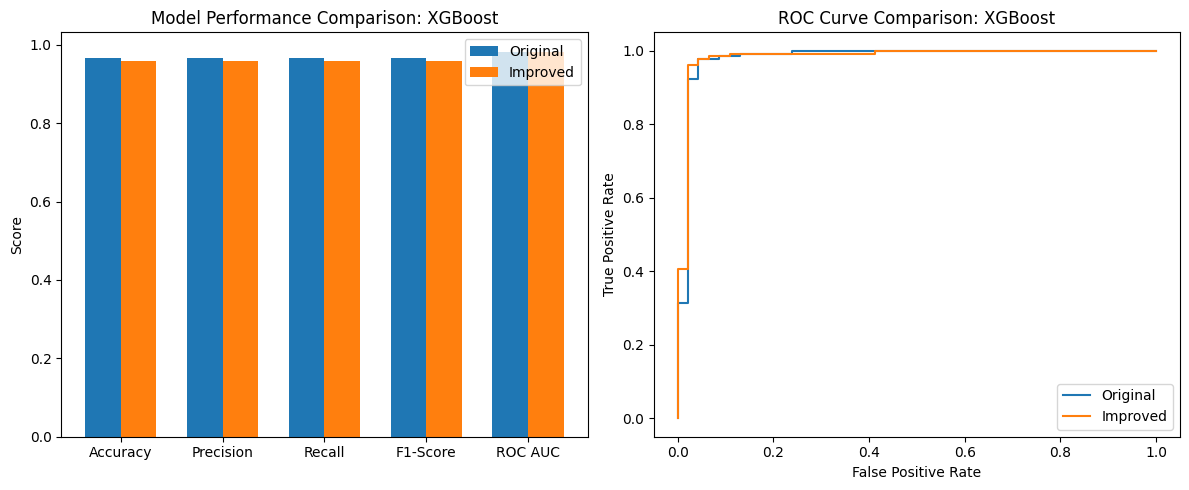

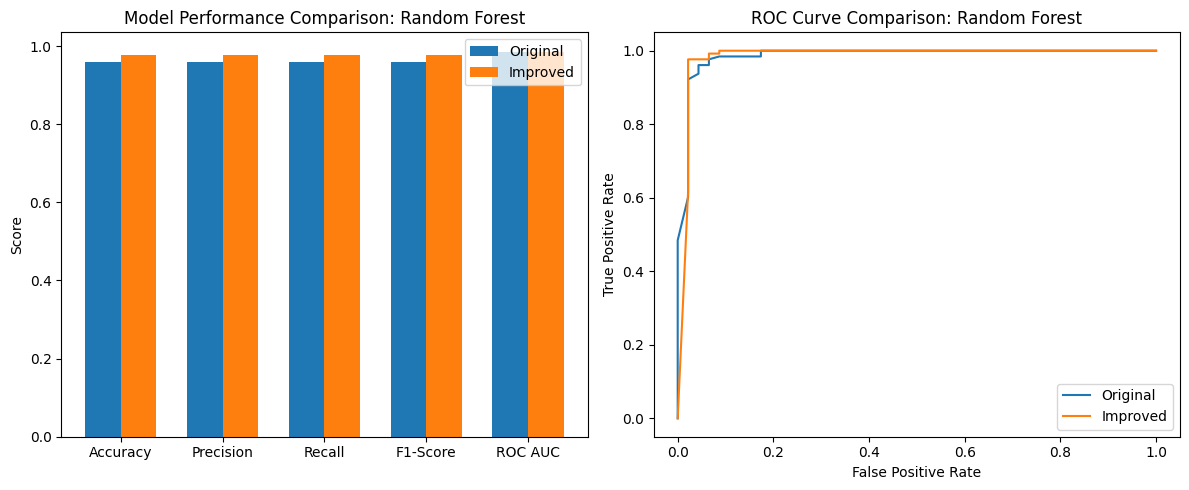

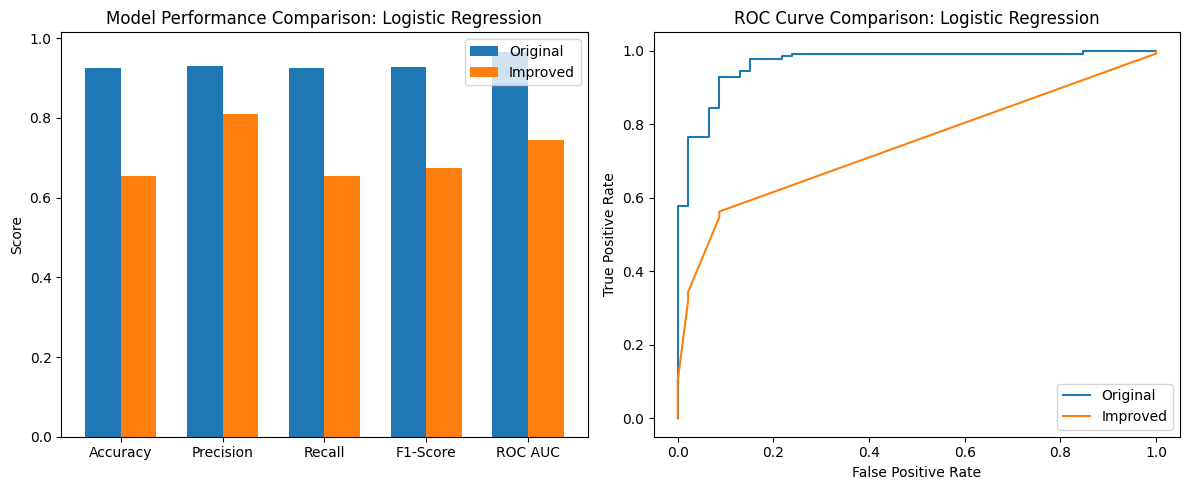

In [ ]:
# prompt: Evaluate & compare both trained_model & improved_models with visual and add tight visuals layout for barchart & ROC Curve. Make it side by side comparison for similar model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_models(trained_models, improved_models, X_test, y_test):
  """
  Evaluates trained and improved models and generates visualizations.

  Args:
      trained_models: A dictionary of trained models.
      improved_models: A dictionary of improved models (with feature selection).
      X_test: Test data (features).
      y_test: Test data (target).
  """
  evaluation_results = {}

  for model_name in trained_models.keys():
      # Evaluate the original model
      model = trained_models[model_name]
      y_pred = model.predict(X_test)
      y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

      evaluation_results[model_name] = {
          'Accuracy': accuracy_score(y_test, y_pred),
          'Precision': precision_score(y_test, y_pred, average='weighted'),
          'Recall': recall_score(y_test, y_pred, average='weighted'),
          'F1-Score': f1_score(y_test, y_pred, average='weighted'),
          'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
          'y_prob': y_prob
      }

      # Evaluate the improved model
      if model_name in improved_models:
          improved_model = improved_models[model_name]
          selected_features = selected_features_dict[model_name]
          X_test_selected = X_test[selected_features]
          y_pred_improved = improved_model.predict(X_test_selected)
          y_prob_improved = improved_model.predict_proba(X_test_selected)[:, 1] if hasattr(improved_model, 'predict_proba') else None


          evaluation_results[model_name + '_improved'] = {
              'Accuracy': accuracy_score(y_test, y_pred_improved),
              'Precision': precision_score(y_test, y_pred_improved, average='weighted'),
              'Recall': recall_score(y_test, y_pred_improved, average='weighted'),
              'F1-Score': f1_score(y_test, y_pred_improved, average='weighted'),
              'ROC AUC': roc_auc_score(y_test, y_prob_improved) if y_prob_improved is not None else None,
              'y_prob': y_prob_improved
          }

  # Visualization
  for model_name in trained_models.keys():
    if model_name in improved_models:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        # Bar chart comparison
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
        values_original = [evaluation_results[model_name].get(metric) for metric in metrics]
        values_improved = [evaluation_results[model_name + '_improved'].get(metric) for metric in metrics]

        x = np.arange(len(metrics))
        width = 0.35
        rects1 = ax1.bar(x - width / 2, values_original, width, label='Original')
        rects2 = ax1.bar(x + width / 2, values_improved, width, label='Improved')

        ax1.set_ylabel('Score')
        ax1.set_title(f'Model Performance Comparison: {model_name}')
        ax1.set_xticks(x)
        ax1.set_xticklabels(metrics)
        ax1.legend()

        # ROC curve comparison
        if evaluation_results[model_name]['ROC AUC'] is not None and evaluation_results[model_name + '_improved']['ROC AUC'] is not None:
            fpr_original, tpr_original, _ = roc_curve(y_test, evaluation_results[model_name]['y_prob'])
            fpr_improved, tpr_improved, _ = roc_curve(y_test, evaluation_results[model_name + '_improved']['y_prob'])

            ax2.plot(fpr_original, tpr_original, label='Original')
            ax2.plot(fpr_improved, tpr_improved, label='Improved')

            ax2.set_xlabel('False Positive Rate')
            ax2.set_ylabel('True Positive Rate')
            ax2.set_title(f'ROC Curve Comparison: {model_name}')
            ax2.legend()
        plt.tight_layout()
        plt.show()
# Evaluate and visualize
evaluate_models(trained_models, improved_models, X_test_encoded, y_test_encoded)

# Test

In [ ]:
model = LogisticRegression(warm_start=True, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


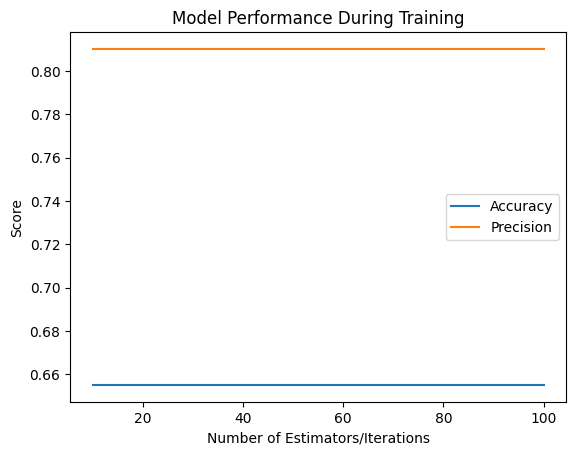

In [ ]:
n_estimators = 100  # Total number of estimators for Random Forest
max_iter = 100  # Total number of iterations for Logistic Regression

accuracy_scores = []
precision_scores = []

# for i in range(10, n_estimators + 1, 10):  # For Random Forest - This is commented out as Logistic Regression should not use this parameter
for i in range(10, max_iter + 1, 10):  # For Logistic Regression - This line is now active
    # model.set_params(n_estimators=i)  # For Random Forest - This is commented out
    model.set_params(max_iter=i)  # For Logistic Regression - This line is now active, using max_iter instead of n_estimators
    model.fit(X_train_encoded[selected_features_dict[model_name]], y_train_encoded.values.ravel())
    y_pred = model.predict(X_test_encoded[selected_features_dict[model_name]])

    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

# plt.plot(range(10, n_estimators + 1, 10), accuracy_scores, label='Accuracy')  # For Random Forest - This is commented out
plt.plot(range(10, max_iter + 1, 10), accuracy_scores, label='Accuracy')  # For Logistic Regression - This line is now active
# plt.plot(range(10, n_estimators + 1, 10), precision_scores, label='Precision')  # For Random Forest - This is commented out
plt.plot(range(10, max_iter + 1, 10), precision_scores, label='Precision')  # For Logistic Regression - This line is now active
plt.xlabel('Number of Estimators/Iterations')
plt.ylabel('Score')
plt.title('Model Performance During Training')
plt.legend()
plt.show()